<a href="https://colab.research.google.com/github/smsarfroz/emotion-speech-recognition/blob/main/SER_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

from IPython.display import Audio
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop


from keras.layers import Conv1D, MaxPooling1D, Flatten

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
print("loaded libraries ")

loaded libraries 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

    return mfccs

In [20]:
radvess_speech_labels = []
ravdess_speech_data = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/'):
    for filename in filenames:
        radvess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finish Loading the Dataset")

Finish Loading the Dataset


In [5]:
ravdess_speech_data

[array([-5.9868207e+02,  5.1607491e+01,  1.0780660e+01,  1.3437082e+01,
         5.4782753e+00,  5.0055690e-02, -4.4521732e+00, -8.5530119e+00,
        -3.2690909e+00,  2.6122966e-01, -4.6167440e+00, -3.6933429e+00,
         2.0232843e-01, -1.7765787e+00,  8.0908686e-01,  1.5278829e+00,
        -1.5355694e+00, -1.2012930e+00,  7.8628635e-01, -7.3216238e+00,
        -4.9825301e+00, -2.3639691e+00, -6.9910941e+00, -5.4178965e-01,
        -6.1248021e+00,  2.0641544e+00, -4.0418653e+00,  4.0767431e+00,
         3.1958699e+00,  2.4472561e+00,  3.3685725e+00,  2.8827243e+00,
         5.8108277e+00,  4.9177160e+00,  6.6206002e+00,  3.1817544e+00,
         1.7811003e+00,  3.6259470e+00,  4.5924592e+00,  5.8150096e+00],
       dtype=float32),
 array([-5.4781207e+02,  6.2277164e+01, -1.1830584e+01,  1.4239296e+01,
         9.8602810e+00, -1.0694509e+01, -1.2243241e+01, -2.5701900e+01,
        -4.6056933e+00,  2.7516618e+00, -5.7539463e+00, -2.8512251e+00,
         2.5861731e+00, -1.4086276e+00, 

In [21]:
ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(2890, 8)

In [22]:
ravdess_speech_data_array.shape

(2890, 40)

In [23]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [24]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [25]:

def create_model_LSTM_with_Conv1D():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(40, 1)))
    model.add(MaxPooling1D(2))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [11]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [12]:
w.shape

(2312, 40, 1)

In [13]:
# train using LSTM model
model_A = create_model_LSTM_with_Conv1D()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=121, shuffle=True)

Epoch 1/121
73/73 [==============================] - 7s 47ms/step - loss: 2.0794 - accuracy: 0.1337 - val_loss: 2.0481 - val_accuracy: 0.2042
Epoch 2/121
73/73 [==============================] - 3s 34ms/step - loss: 2.0476 - accuracy: 0.1791 - val_loss: 2.0221 - val_accuracy: 0.2180
Epoch 3/121
73/73 [==============================] - 3s 35ms/step - loss: 1.9948 - accuracy: 0.2150 - val_loss: 1.8932 - val_accuracy: 0.3183
Epoch 4/121
73/73 [==============================] - 4s 59ms/step - loss: 1.9327 - accuracy: 0.2500 - val_loss: 1.8182 - val_accuracy: 0.3080
Epoch 5/121
73/73 [==============================] - 4s 61ms/step - loss: 1.9119 - accuracy: 0.2517 - val_loss: 1.8106 - val_accuracy: 0.3183
Epoch 6/121
73/73 [==============================] - 3s 36ms/step - loss: 1.8323 - accuracy: 0.2924 - val_loss: 1.8016 - val_accuracy: 0.3114
Epoch 7/121
73/73 [==============================] - 3s 35ms/step - loss: 1.7890 - accuracy: 0.3114 - val_loss: 1.7708 - val_accuracy: 0.3080
Epoch 

Epoch 1/121
73/73 [==============================] - 9s 75ms/step - loss: 2.0824 - accuracy: 0.1423 - val_loss: 2.0552 - val_accuracy: 0.1782
Epoch 2/121
73/73 [==============================] - 4s 54ms/step - loss: 2.0410 - accuracy: 0.1548 - val_loss: 1.9736 - val_accuracy: 0.2422
Epoch 3/121
73/73 [==============================] - 3s 40ms/step - loss: 1.9743 - accuracy: 0.2020 - val_loss: 1.8552 - val_accuracy: 0.2976
Epoch 4/121
73/73 [==============================] - 3s 37ms/step - loss: 1.9165 - accuracy: 0.2318 - val_loss: 1.8037 - val_accuracy: 0.3304
Epoch 5/121
73/73 [==============================] - 3s 38ms/step - loss: 1.8566 - accuracy: 0.2647 - val_loss: 1.7811 - val_accuracy: 0.3201
Epoch 6/121
73/73 [==============================] - 5s 66ms/step - loss: 1.8399 - accuracy: 0.2855 - val_loss: 1.7455 - val_accuracy: 0.3408
Epoch 7/121
73/73 [==============================] - 4s 57ms/step - loss: 1.7905 - accuracy: 0.2993 - val_loss: 1.7192 - val_accuracy: 0.3339
Epoch 

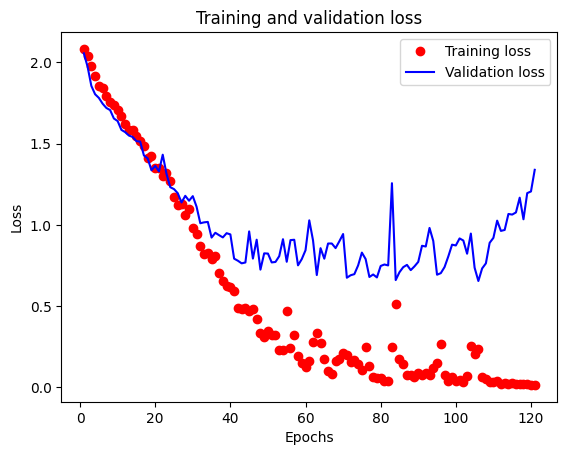

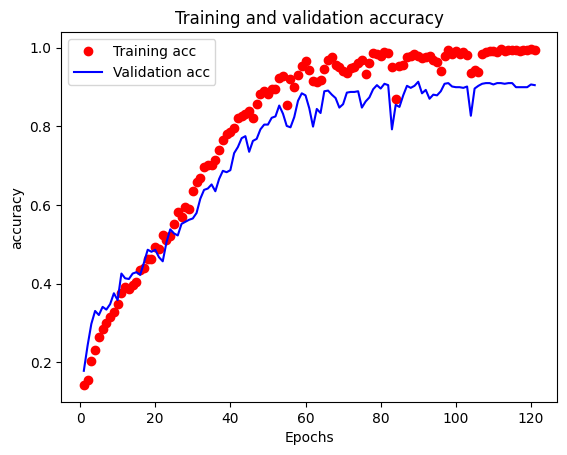

Epoch 1/121
73/73 [==============================] - 7s 59ms/step - loss: 2.0765 - accuracy: 0.1380 - val_loss: 2.0529 - val_accuracy: 0.1869
Epoch 2/121
73/73 [==============================] - 5s 63ms/step - loss: 2.0494 - accuracy: 0.1631 - val_loss: 2.0316 - val_accuracy: 0.1851
Epoch 3/121
73/73 [==============================] - 3s 42ms/step - loss: 2.0181 - accuracy: 0.1925 - val_loss: 1.9713 - val_accuracy: 0.2042
Epoch 4/121
73/73 [==============================] - 3s 38ms/step - loss: 1.9777 - accuracy: 0.2024 - val_loss: 1.9204 - val_accuracy: 0.2370
Epoch 5/121
73/73 [==============================] - 3s 38ms/step - loss: 1.9288 - accuracy: 0.2448 - val_loss: 1.8602 - val_accuracy: 0.2907
Epoch 6/121
73/73 [==============================] - 3s 44ms/step - loss: 1.9060 - accuracy: 0.2643 - val_loss: 1.8128 - val_accuracy: 0.3253
Epoch 7/121
73/73 [==============================] - 7s 95ms/step - loss: 1.8724 - accuracy: 0.2682 - val_loss: 1.8058 - val_accuracy: 0.3201
Epoch 

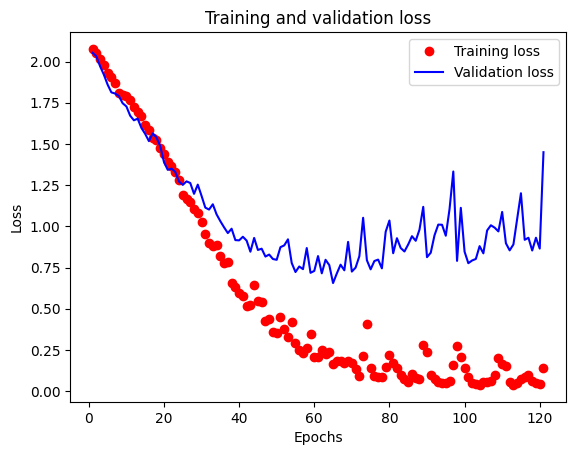

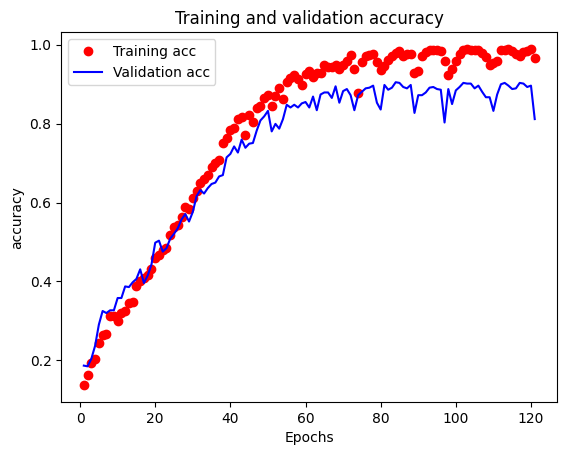

Epoch 1/121
73/73 [==============================] - 6s 48ms/step - loss: 2.0809 - accuracy: 0.1375 - val_loss: 2.0616 - val_accuracy: 0.1817
Epoch 2/121
73/73 [==============================] - 5s 68ms/step - loss: 2.0485 - accuracy: 0.1674 - val_loss: 1.9916 - val_accuracy: 0.1972
Epoch 3/121
73/73 [==============================] - 5s 62ms/step - loss: 2.0105 - accuracy: 0.2011 - val_loss: 1.9687 - val_accuracy: 0.2543
Epoch 4/121
73/73 [==============================] - 3s 41ms/step - loss: 1.9534 - accuracy: 0.2401 - val_loss: 1.8479 - val_accuracy: 0.3218
Epoch 5/121
73/73 [==============================] - 3s 39ms/step - loss: 1.8995 - accuracy: 0.2798 - val_loss: 1.8131 - val_accuracy: 0.3270
Epoch 6/121
73/73 [==============================] - 3s 38ms/step - loss: 1.8695 - accuracy: 0.2876 - val_loss: 1.7925 - val_accuracy: 0.3270
Epoch 7/121
73/73 [==============================] - 4s 61ms/step - loss: 1.8558 - accuracy: 0.2863 - val_loss: 1.7799 - val_accuracy: 0.3166
Epoch 

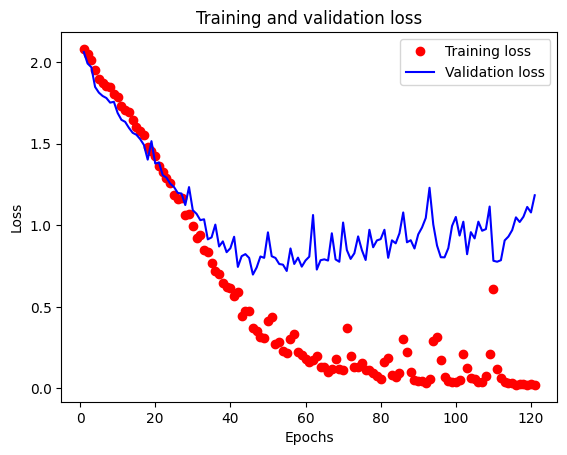

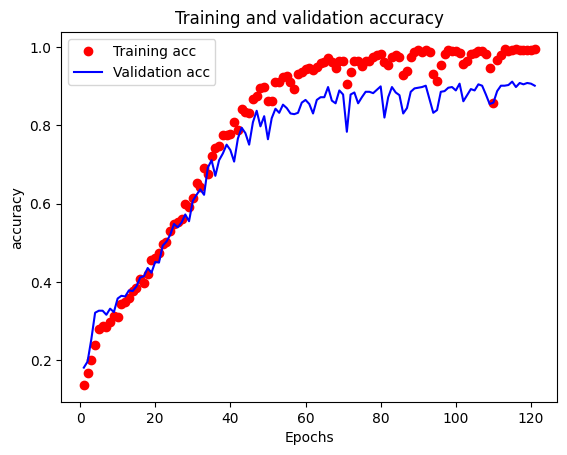

Epoch 1/121
73/73 [==============================] - 9s 81ms/step - loss: 2.0733 - accuracy: 0.1432 - val_loss: 2.0444 - val_accuracy: 0.1955
Epoch 2/121
73/73 [==============================] - 4s 53ms/step - loss: 2.0275 - accuracy: 0.1769 - val_loss: 1.9920 - val_accuracy: 0.2215
Epoch 3/121
73/73 [==============================] - 3s 39ms/step - loss: 1.9773 - accuracy: 0.2171 - val_loss: 1.9102 - val_accuracy: 0.2474
Epoch 4/121
73/73 [==============================] - 3s 39ms/step - loss: 1.9518 - accuracy: 0.2388 - val_loss: 1.8700 - val_accuracy: 0.2941
Epoch 5/121
73/73 [==============================] - 3s 39ms/step - loss: 1.8972 - accuracy: 0.2794 - val_loss: 1.8305 - val_accuracy: 0.3183
Epoch 6/121
73/73 [==============================] - 5s 69ms/step - loss: 1.8579 - accuracy: 0.2846 - val_loss: 1.7824 - val_accuracy: 0.3287
Epoch 7/121
73/73 [==============================] - 4s 60ms/step - loss: 1.8060 - accuracy: 0.3058 - val_loss: 1.7792 - val_accuracy: 0.3201
Epoch 

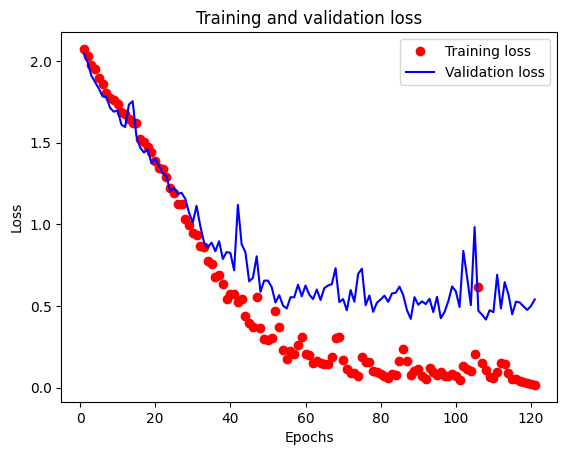

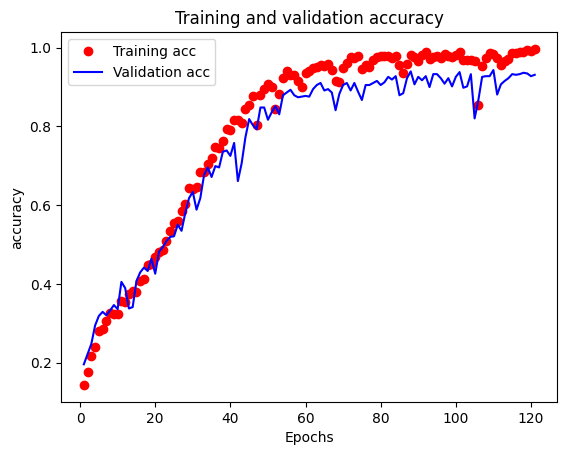

Epoch 1/121
73/73 [==============================] - 10s 83ms/step - loss: 2.0725 - accuracy: 0.1466 - val_loss: 2.0458 - val_accuracy: 0.1817
Epoch 2/121
73/73 [==============================] - 4s 51ms/step - loss: 2.0411 - accuracy: 0.1713 - val_loss: 1.9791 - val_accuracy: 0.2370
Epoch 3/121
73/73 [==============================] - 3s 41ms/step - loss: 1.9777 - accuracy: 0.2223 - val_loss: 1.8620 - val_accuracy: 0.2958
Epoch 4/121
73/73 [==============================] - 3s 41ms/step - loss: 1.9295 - accuracy: 0.2500 - val_loss: 1.8388 - val_accuracy: 0.3149
Epoch 5/121
73/73 [==============================] - 4s 55ms/step - loss: 1.8702 - accuracy: 0.2638 - val_loss: 1.7980 - val_accuracy: 0.3304
Epoch 6/121
73/73 [==============================] - 5s 72ms/step - loss: 1.8040 - accuracy: 0.2933 - val_loss: 1.7197 - val_accuracy: 0.3529
Epoch 7/121
73/73 [==============================] - 3s 47ms/step - loss: 1.8076 - accuracy: 0.3002 - val_loss: 1.7249 - val_accuracy: 0.3339
Epoch

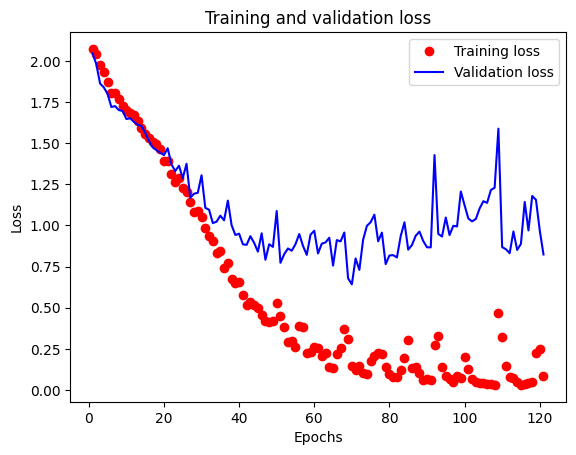

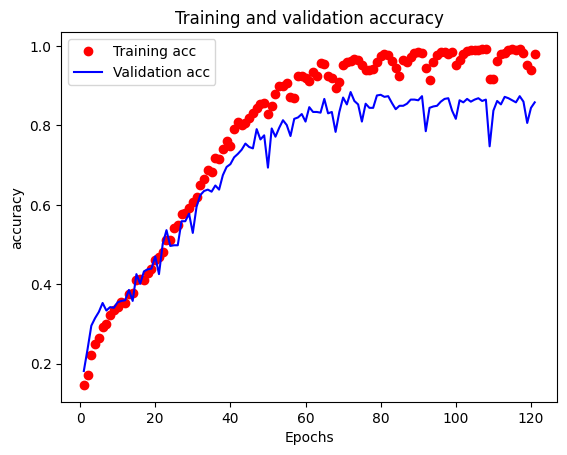

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=9)
for train_index, test_index in skf.split(ravdess_speech_data_array, ravdess_speech_label_array):
    x_train, x_test = ravdess_speech_data_array[train_index], ravdess_speech_data_array[test_index]
    y_train, y_test = labels_categorical[train_index], labels_categorical[test_index]

    model = create_model_LSTM_with_Conv1D()
    history = model.fit(np.expand_dims(x_train, -1), y_train, validation_data=(np.expand_dims(x_test, -1), y_test), epochs=121, shuffle=True)

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.plot(epochs, acc, 'ro', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

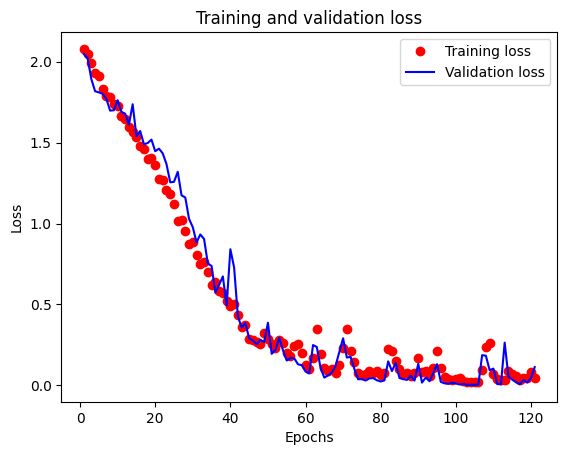

In [14]:
# loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


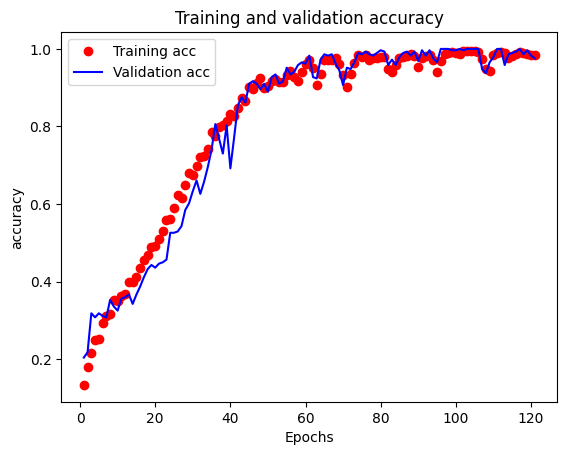

In [15]:
# accuracy plots using LSTM model
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [16]:
# evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

10/10 [==============================] - 0s 11ms/step - loss: 4.4674 - accuracy: 0.6332


[4.467426300048828, 0.633217990398407]

In [17]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_04/03-01-01-01-02-01-04.wav')
audio_path = '/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_04/03-01-01-01-02-01-04.wav'
Audio(audio_path)

1/1 [==============================] - 1s 564ms/step
neutral


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_14/03-01-02-02-02-01-14.wav')
audio_path = '/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_14/03-01-02-02-02-01-14.wav'
Audio(audio_path)

1/1 [==============================] - 0s 54ms/step
calm


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_20/03-01-05-01-01-01-20.wav')
audio_path = '/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_20/03-01-05-01-01-01-20.wav'
Audio(audio_path)

1/1 [==============================] - 0s 41ms/step
angry


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_22/03-01-04-02-01-02-22.wav')
audio_path = '/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_22/03-01-04-02-01-02-22.wav'
Audio(audio_path)

1/1 [==============================] - 0s 37ms/step
sad


In [ ]:
model_A.save('mymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model_A.predict(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:], -1))

predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(labels_categorical[training_samples+validation_samples:], axis=1)

from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)



10/10 [==============================] - 0s 43ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.71      0.56      0.63        36
           2       0.78      0.55      0.65        38
           3       0.57      0.69      0.63        39
           4       0.82      0.59      0.69        39
           5       0.66      0.68      0.67        37
           6       0.43      0.65      0.52        40
           7       0.75      0.75      0.75        40

    accuracy                           0.64       289
   macro avg       0.66      0.63      0.64       289
weighted avg       0.67      0.64      0.64       289


Confusion Matrix:
[[12  0  0  0  0  2  6  0]
 [ 2 20  0  2  0  4  8  0]
 [ 2  0 21  6  1  2  2  4]
 [ 2  0  2 27  0  2  4  2]
 [ 0  0  4  0 23  2  6  4]
 [ 0  2  0 10  0 25  0  0]
 [ 3  6  0  2  2  1 26  0]
 [ 0  0  0  0  2  0  8 30]]


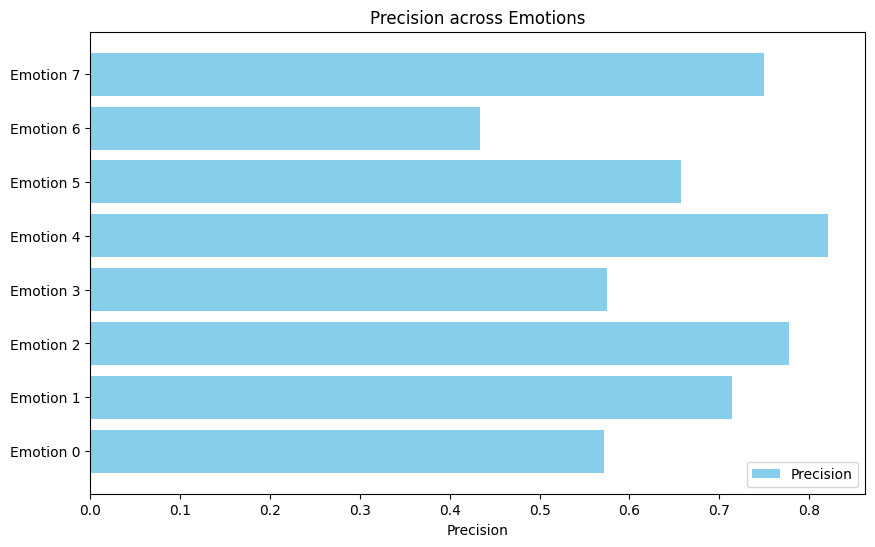

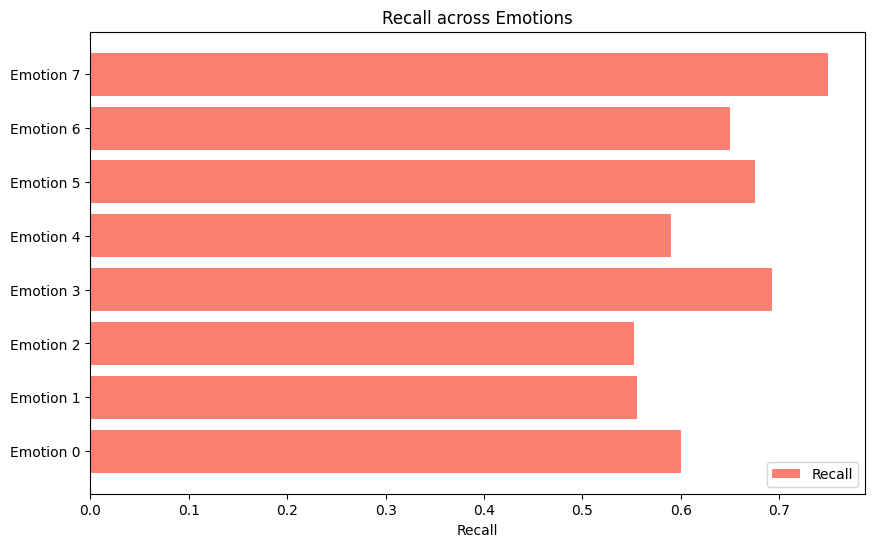

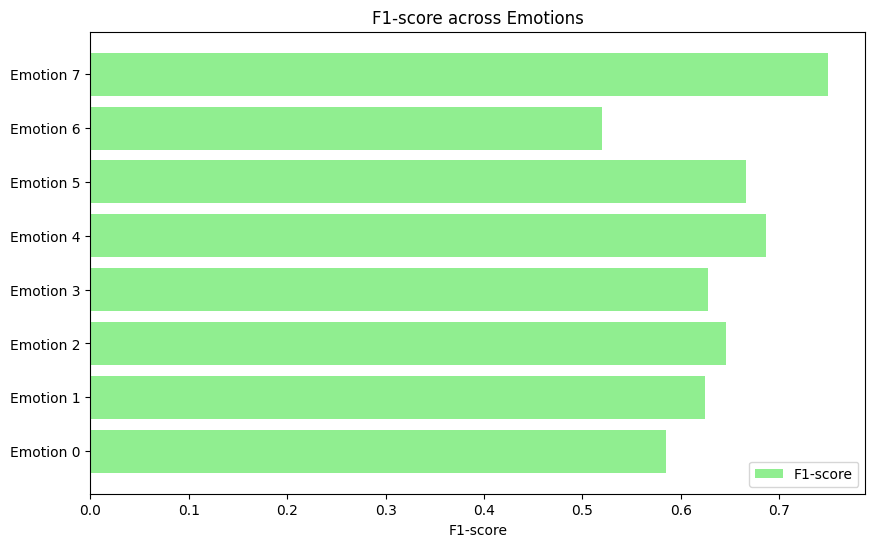

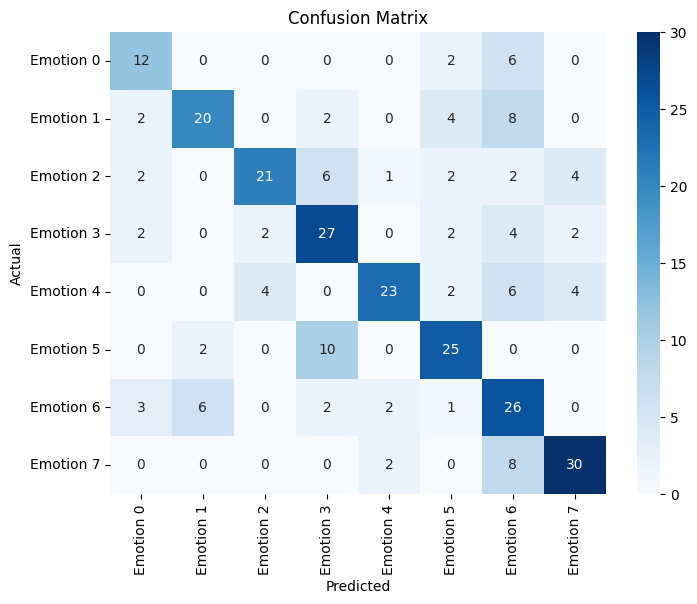

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

class_report_dict = classification_report(true_labels, predicted_labels, output_dict=True)

precisions = [class_report_dict[str(i)]['precision'] for i in range(8)]
recalls = [class_report_dict[str(i)]['recall'] for i in range(8)]
f1_scores = [class_report_dict[str(i)]['f1-score'] for i in range(8)]

categories = ['Emotion 0', 'Emotion 1', 'Emotion 2', 'Emotion 3', 'Emotion 4', 'Emotion 5', 'Emotion 6', 'Emotion 7']

plt.figure(figsize=(10, 6))

plt.barh(categories, precisions, color='skyblue', label='Precision')
plt.xlabel('Precision')
plt.title('Precision across Emotions')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.barh(categories, recalls, color='salmon', label='Recall')
plt.xlabel('Recall')
plt.title('Recall across Emotions')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.barh(categories, f1_scores, color='lightgreen', label='F1-score')
plt.xlabel('F1-score')
plt.title('F1-score across Emotions')
plt.legend()

plt.show()


emotions = ['Emotion 0', 'Emotion 1', 'Emotion 2', 'Emotion 3', 'Emotion 4', 'Emotion 5', 'Emotion 6', 'Emotion 7']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()